In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import shutil
import joblib
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Black = os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Black Soil')
Cinder = os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Cinder Soil')
Laterite = os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Laterite Soil')
Peat = os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Peat Soil')
Yellow= os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Yellow Soil')
Sand= os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Sand Soil')
Silt= os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Silt Soil')
Gravel= os.path.join('/content/drive/MyDrive/AGRICULTURE/Data/TRAIN/Gravel Soil')

In [ ]:
image_size = 220
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
import os
import cv2

data_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'
classes = ['Black Soil', 'Cinder Soil', 'Gravel Soil', 'Laterite Soil', 'Peat Soil', 'Sand Soil', 'Silt Soil', 'Yellow Soil']

# Function to apply slight Gaussian blur to an image and save it
def apply_blur_to_image(input_path, output_path):
    img = cv2.imread(input_path)
    if img is not None:
        blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
        cv2.imwrite(output_path, blurred_img)

# Iterate through each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create a directory for blurred images within the class directory
    blurred_dir = os.path.join(class_dir, 'Blurred')
    os.makedirs(blurred_dir, exist_ok=True)

    # Process each image file in the class directory
    for file_name in os.listdir(class_dir):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            input_image_path = os.path.join(class_dir, file_name)
            output_image_path = os.path.join(blurred_dir, file_name)

            # Apply blur to the image and save it
            apply_blur_to_image(input_image_path, output_image_path)

print("Blur applied to images within class directories.")


In [ ]:
import os
import shutil

data_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'
classes = ['Black Soil', 'Cinder Soil', 'Gravel Soil', 'Laterite Soil', 'Peat Soil', 'Sand Soil', 'Silt Soil', 'Yellow Soil']

# Iterate through each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    blurred_dir = os.path.join(class_dir, 'Blurred')

    # Check if the 'Blurred' directory exists within the class directory
    if os.path.exists(blurred_dir) and os.path.isdir(blurred_dir):
        # Iterate through the blurred images in the 'Blurred' directory
        for file_name in os.listdir(blurred_dir):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                blurred_image_path = os.path.join(blurred_dir, file_name)

                # Change the filename (e.g., add a prefix 'blurred_')
                new_file_name = 'blurred_' + file_name

                destination_path = os.path.join(class_dir, new_file_name)

                # Move the blurred image with the new filename back to the class directory
                shutil.move(blurred_image_path, destination_path)

print("Blur images moved back to their respective class directories with new filenames.")


Blur images moved back to their respective class directories with new filenames.


In [ ]:

data_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'

train_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'
valid_dir = '/content/drive/MyDrive/AGRICULTURE/Data/VALID_DATA/'


classes = ['Black Soil', 'Cinder Soil', 'Gravel Soil', 'Laterite Soil', 'Peat Soil', 'Sand Soil', 'Silt Soil', 'Yellow Soil']


validation_percentage = 0.2

for cls in classes:
    src_dir = os.path.join(data_dir, cls)
    files = os.listdir(src_dir)
    num_files = len(files)
    num_validation_files = int(num_files * validation_percentage)

    validation_files = files[:num_validation_files]
    train_files = files[num_validation_files:]

    for file in validation_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(valid_dir, cls, file))
    for file in train_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dir, cls, file))


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil','Gravel Soil', 'Laterite Soil','Peat Soil','Sand Soil','Silt Soil','Yellow Soil'],class_mode='categorical')

Found 739 images belonging to 8 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Gravel Soil': 2, 'Laterite Soil': 3, 'Peat Soil': 4, 'Sand Soil': 5, 'Silt Soil': 6, 'Yellow Soil': 7}


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Sixth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),




    # Flatten the results
    tf.keras.layers.Flatten(),

    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),

    # 8 output neurons for 8 classes with the softmax activation (modified)
    tf.keras.layers.Dense(8, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['acc']
)

In [ ]:
total_sample=train_generator.n
n_epochs=32

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1
)

Epoch 1/32
73/73 [==============================] - 7s 92ms/step - loss: 1.3644 - acc: 0.3800
Epoch 2/32
73/73 [==============================] - 3s 42ms/step - loss: 1.1618 - acc: 0.4911
Epoch 3/32
73/73 [==============================] - 3s 41ms/step - loss: 1.0273 - acc: 0.5418
Epoch 4/32
73/73 [==============================] - 3s 47ms/step - loss: 0.9416 - acc: 0.5610
Epoch 5/32
73/73 [==============================] - 3s 40ms/step - loss: 0.9139 - acc: 0.5967
Epoch 6/32
73/73 [==============================] - 3s 43ms/step - loss: 0.8648 - acc: 0.6214
Epoch 7/32
73/73 [==============================] - 4s 50ms/step - loss: 0.8406 - acc: 0.6630
Epoch 8/32
73/73 [==============================] - 3s 39ms/step - loss: 0.7480 - acc: 0.6886
Epoch 9/32
73/73 [==============================] - 3s 40ms/step - loss: 0.6505 - acc: 0.7435
Epoch 10/32
73/73 [==============================] - 4s 53ms/step - loss: 0.6342 - acc: 0.7654
Epoch 11/32
73/73 [==============================] - 3s 40m

In [ ]:
model.save('Agriculture_model.h5')
model.save(filepath="/content/drive/MyDrive/AGRICULTURE/Program/model/Agriculture_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights(filepath="/content/drive/MyDrive/AGRICULTURE/Program/model/Agriculture_model.h5")

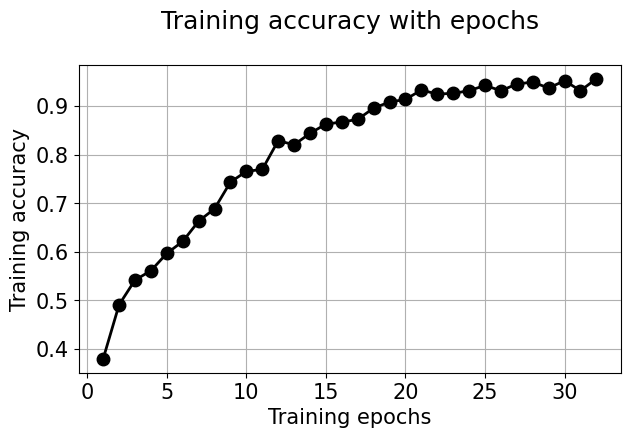

In [ ]:

plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [ ]:
class_to_soil_type = {
    0: 'Black Soil',
    1: 'Cinder Soil',
    2: 'Gravel Soil',
    3: 'Laterite Soil',
    4: 'Peat Soil',
    5: 'Sand Soil',
    6: 'Silt Soil',
    7: 'Yellow Soil'
}

1/1 [==============================] - 1s 513ms/step


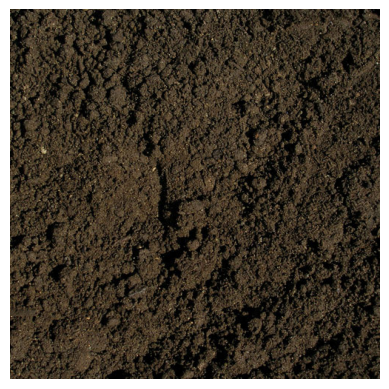

Peat Soil


In [ ]:
img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black.jpg'

img_size=(220,220)
img=load_img(img_path,target_size=img_size)
img=img_to_array(img)
img=img/255.0

img=np.expand_dims(img,axis=0)


predictions=model.predict(img)
predicted_class_index=np.argmax(predictions,axis=1)[0]

predicted_soil=class_to_soil_type[predicted_class_index]


img_display = mpimg.imread(img_path)


plt.imshow(img_display)
plt.axis('off')
plt.show()

print(predicted_soil)


In [ ]:
image_size = 220
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

valid_datagen = ImageDataGenerator(rescale=1/255)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/AGRICULTURE/Data/VALID_DATA/',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil','Gravel Soil', 'Laterite Soil','Peat Soil','Sand Soil','Silt Soil','Yellow Soil'],
        class_mode='categorical'
)



history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    verbose=1
)


Found 179 images belonging to 8 classes.
Epoch 1/15
74/74 [==============================] - 52s 715ms/step - loss: 0.1649 - acc: 0.9540 - val_loss: 0.1090 - val_acc: 0.9497
Epoch 2/15
74/74 [==============================] - 5s 66ms/step - loss: 0.1119 - acc: 0.9756 - val_loss: 0.2061 - val_acc: 0.9497
Epoch 3/15
74/74 [==============================] - 4s 56ms/step - loss: 0.1770 - acc: 0.9553 - val_loss: 0.5883 - val_acc: 0.8771
Epoch 4/15
74/74 [==============================] - 4s 50ms/step - loss: 0.1411 - acc: 0.9662 - val_loss: 0.0797 - val_acc: 0.9721
Epoch 5/15
74/74 [==============================] - 4s 49ms/step - loss: 0.1778 - acc: 0.9621 - val_loss: 0.0514 - val_acc: 0.9832
Epoch 6/15
74/74 [==============================] - 4s 53ms/step - loss: 0.1399 - acc: 0.9689 - val_loss: 0.0375 - val_acc: 0.9888
Epoch 7/15
74/74 [==============================] - 4s 48ms/step - loss: 0.1873 - acc: 0.9621 - val_loss: 0.0458 - val_acc: 0.9888
Epoch 8/15
74/74 [======================

In [ ]:
model.save('Agriculture_model_TEST.h5')
model.save(filepath="/content/drive/MyDrive/AGRICULTURE/Program/model/model_TEST/")


loss, accuracy = model.evaluate(valid_generator)
print(f'Loss on the testing set: {loss}')
print(f'Accuracy on the testing set: {accuracy}')

18/18 [==============================] - 1s 60ms/step - loss: 0.0538 - acc: 0.9832
Loss on the testing set: 0.05384202301502228
Accuracy on the testing set: 0.9832402467727661


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('model_TEST')
tflite_model = converter.convert()
open("soil_TEST.tflite", "wb").write(tflite_model)
model.save_weights("Agriculture_model_TEST.h5")

1/1 [==============================] - 0s 160ms/step


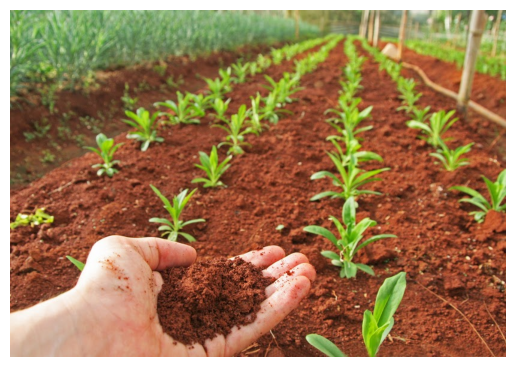

Laterite Soil


In [ ]:
#img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black_drone.jpg'
#img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black.jpg'
img_path = '/content/drive/MyDrive/AGRICULTURE/test.jpg'

img_size=(220,220)
img=load_img(img_path,target_size=img_size)
img=img_to_array(img)
img=img/255.0

img=np.expand_dims(img,axis=0)


predictions=model.predict(img)
predicted_class_index=np.argmax(predictions,axis=1)[0]

predicted_soil=class_to_soil_type[predicted_class_index]


img_display = mpimg.imread(img_path)


plt.imshow(img_display)
plt.axis('off')
plt.show()

print(predicted_soil)


1/1 [==============================] - 0s 48ms/step


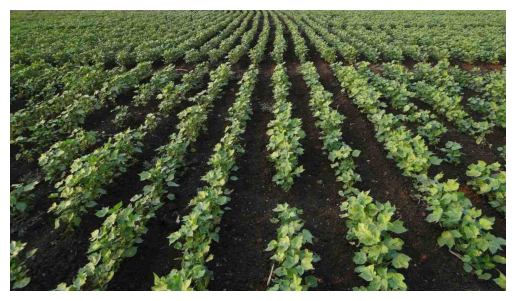

Black Soil


In [ ]:
img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black_drone.jpg'
#img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black.jpg'
#img_path = '/content/drive/MyDrive/AGRICULTURE/test.jpg'

img_size=(220,220)
img=load_img(img_path,target_size=img_size)
img=img_to_array(img)
img=img/255.0

img=np.expand_dims(img,axis=0)


predictions=model.predict(img)
predicted_class_index=np.argmax(predictions,axis=1)[0]

predicted_soil=class_to_soil_type[predicted_class_index]


img_display = mpimg.imread(img_path)


plt.imshow(img_display)
plt.axis('off')
plt.show()

print(predicted_soil)


1/1 [==============================] - 0s 22ms/step


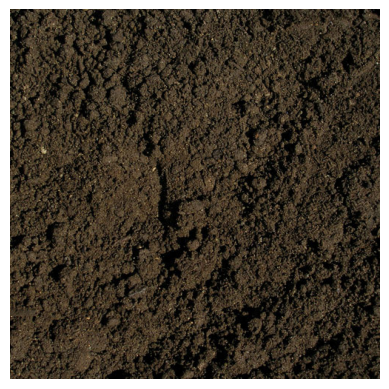

Black Soil


In [ ]:
#img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black_drone.jpg'
img_path = '/content/drive/MyDrive/AGRICULTURE/test_soil_black.jpg'
#img_path = '/content/drive/MyDrive/AGRICULTURE/test.jpg'

img_size=(220,220)
img=load_img(img_path,target_size=img_size)
img=img_to_array(img)
img=img/255.0

img=np.expand_dims(img,axis=0)


predictions=model.predict(img)
predicted_class_index=np.argmax(predictions,axis=1)[0]

predicted_soil=class_to_soil_type[predicted_class_index]


img_display = mpimg.imread(img_path)


plt.imshow(img_display)
plt.axis('off')
plt.show()

print(predicted_soil)


In [ ]:
import os
import shutil

data_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'
train_dir = '/content/drive/MyDrive/AGRICULTURE/Data/TRAIN_DATA/'
valid_dir = '/content/drive/MyDrive/AGRICULTURE/Data/VALID_DATA/'

classes = ['Black Soil', 'Cinder Soil', 'Gravel Soil', 'Laterite Soil', 'Peat Soil', 'Sand Soil', 'Silt Soil', 'Yellow Soil']

for cls in classes:
    src_dir = os.path.join(valid_dir, cls)
    files = os.listdir(src_dir)

    for file in files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dir, cls, file))


In [ ]:
#pip freeze > requirements.txt